In [1]:
# imports and tell matplotlib to render graphs inline
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# import iris dataset
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                  header=None)
iris.columns = ["sepal_length","sepal_width",
                'petal_length','petal_width','species']
iris.dropna(how='all', inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

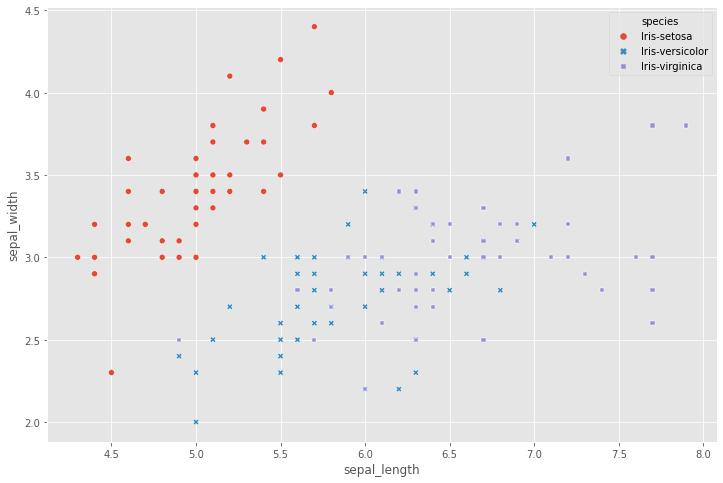

In [6]:
# plot the data
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12,8)
sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width, hue=iris.species, style=iris.species)

standardize the dataset
using formula $$z = \frac{x_{i} - \bar{x}}{\sigma_{x}}$$

In [29]:
# standardize the dataset
arr = iris.iloc[:, :4]
X = arr.values
y = iris.species.values
rows, columns = arr.shape
temp_arr = np.zeros(rows)
std_arr = np.zeros((rows, columns))
for column in range(columns):
    mean = np.mean(X[:, column])
    std = np.std(X[:, column])
    temp_arr = np.empty(0)
    for element in X[:, column]:
        temp_arr = np.append(temp_arr, (element-mean)/std)
    std_arr[:, column] = temp_arr
X = std_arr

find the covariance matrix using the formula
$$cov: \sum = \frac{1}{n-1} \times ((X - \bar{x}^{T})(X - \bar{x})) $$

In [31]:
# find the covariance matrix
covariance_matrix = np.cov(X.T)
covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [34]:
# find the eigen values and eigen vectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print(f"eigen vectors:\n{eigen_vectors}")
print(f"eigen values: {eigen_values}")

eigen vectors:
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
eigen values: [2.93035378 0.92740362 0.14834223 0.02074601]


In [36]:
# find data explaination on each component values
variance_explained = []
for eigen_value in eigen_values:
    variance_explained.append(eigen_value/sum(eigen_values) * 100)
print(f"variance explained by each eigen vector: {variance_explained}")

variance explained by each eigen vector: [72.77045209380132, 23.030523267680664, 3.6838319576273837, 0.5151926808906325]


In [37]:
# we can find the commulative sum to find sum of which components explains the most of data
commulative_variance_explained = np.cumsum(variance_explained)
print(f"commulative sum of variance explained: {commulative_variance_explained}")

commulative sum of variance explained: [ 72.77045209  95.80097536  99.48480732 100.        ]


Text(0.5, 1.0, 'Commulative explained variance vs no. of components')

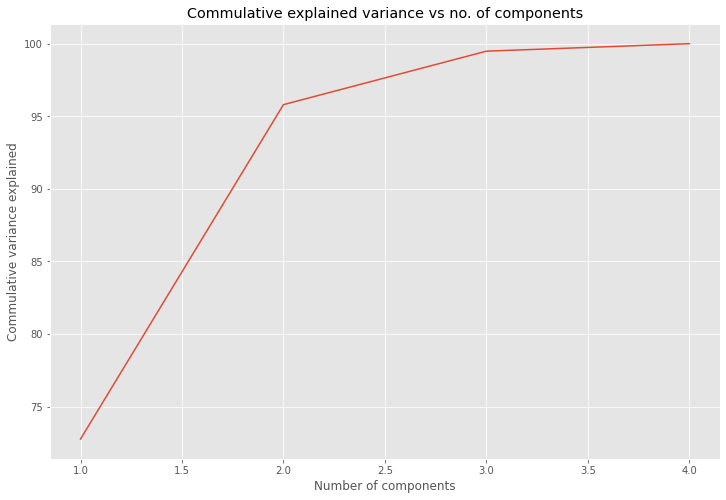

In [38]:
# we can also visualize the commulative_variance explained
sns.lineplot(x = [1,2,3,4], y=commulative_variance_explained)
plt.xlabel("Number of components")
plt.ylabel("Commulative variance explained")
plt.title("Commulative explained variance vs no. of components")

We can choose the first two components as these components explain the 95% of data.
Now we can create a projection matrix which we will apply on the original data to get the decomposed data.

In [39]:
# creating projection matrix and decomposing the original data
proj_matrix = (eigen_vectors[:2]).T
print(f"projection matrix:\n{proj_matrix}")

projection matrix:
[[ 0.52237162 -0.26335492]
 [-0.37231836 -0.92555649]
 [-0.72101681  0.24203288]
 [ 0.26199559 -0.12413481]]


In [40]:
X_principal = X.dot(proj_matrix)
print(f"principal components of X:\n {X_principal}")

principal components of X:
 [[-0.2316583  -0.87967436]
 [ 0.07253025  0.25502854]
 [-0.18536908 -0.12326756]
 [-0.24451042  0.15034585]
 [-0.38110853 -1.06194072]
 [-0.44050933 -1.82346152]
 [-0.42753067 -0.52226744]
 [-0.24979851 -0.61982431]
 [-0.15778746  0.62875583]
 [-0.08907179  0.07093576]
 [-0.2550866  -1.38999448]
 [-0.41738895 -0.54224064]
 [-0.02520974  0.30325906]
 [-0.21867964  0.42151973]
 [-0.13737131 -2.20145476]
 [-0.59940097 -3.01760131]
 [-0.27650482 -1.878515  ]
 [-0.19721296 -0.89599473]
 [-0.19891512 -1.6886951 ]
 [-0.49668081 -1.52476091]
 [-0.07862214 -0.71993819]
 [-0.3760799  -1.32690476]
 [-0.47028264 -0.98935358]
 [-0.07901452 -0.45899233]
 [-0.54039234 -0.50095053]
 [ 0.05382265  0.25064512]
 [-0.22190896 -0.63870169]
 [-0.20936477 -0.89782114]
 [-0.08220807 -0.69740799]
 [-0.30837246 -0.08197745]
 [-0.15892223  0.10028892]
 [ 0.07227079 -0.78010568]
 [-0.76074355 -2.16655987]
 [-0.58156868 -2.50655059]
 [-0.08907179  0.07093576]
 [ 0.04551602 -0.23276139]
